# Test Using VSCode Jupyter


In [6]:
# Load the Pandas libraries with alias 'pd' 
import pandas as pd 
# Read data from GitHub and set index cols for stack()
tsdata = pd.read_csv(
    "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
) 
# Add multi column index for stacking the date columns into rows
tsdata_index = tsdata.set_index(['Province/State','Country/Region','Lat','Long']
)
# Preview the first 5 lines of the loaded data 
tsdata_index.head()

1/22/20  1/23/20  1/24/20  \
Province/State Country/Region Lat      Long                                 
NaN            Afghanistan     33.0000 65.0000        0        0        0   
               Albania         41.1533 20.1683        0        0        0   
               Algeria         28.0339 1.6596         0        0        0   
               Andorra         42.5063 1.5218         0        0        0   
               Angola         -11.2027 17.8739        0        0        0   

                                                1/25/20  1/26/20  1/27/20  \
Province/State Country/Region Lat      Long                                 
NaN            Afghanistan     33.0000 65.0000        0        0        0   
               Albania         41.1533 20.1683        0        0        0   
               Algeria         28.0339 1.6596         0        0        0   
               Andorra         42.5063 1.5218         0        0        0   
               Angola         -11.2027 17.8739        0        0        0   

                                                1/28/20  1/29/20  1/30/20  \
Province/State Country/Region Lat      Long                                 
NaN            Afghanistan     33.0000 65.0000        0        0        0   
               Albania         41.1533 20.1683        0        0        0   
               Algeria         28.0339 1.6596         0        0        0   
               Andorra         42.5063 1.5218         0        0        0   
               Angola         -11.2027 17.8739        0        0        0   

                                                1/31/20  ...  4/7/20  4/8/20  \
Province/State Country/Region Lat      Long              ...                   
NaN            Afghanistan     33.0000 65.0000        0  ...     423     444   
               Albania         41.1533 20.1683        0  ...     383     400   
               Algeria         28.0339 1.6596         0  ...    1468    1572   
               Andorra         42.5063 1.5218         0  ...     545     564   
               Angola         -11.2027 17.8739        0  ...      17      19   

                                                4/9/20  4/10/20  4/11/20  \
Province/State Country/Region Lat      Long                                
NaN            Afghanistan     33.0000 65.0000     484      521      555   
               Albania         41.1533 20.1683     409      416      433   
               Algeria         28.0339 1.6596     1666     1761     1825   
               Andorra         42.5063 1.5218      583      601      601   
               Angola         -11.2027 17.8739      19       19       19   

                                                4/12/20  4/13/20  4/14/20  \
Province/State Country/Region Lat      Long                                 
NaN            Afghanistan     33.0000 65.0000      607      665      714   
               Albania         41.1533 20.1683      446      467      475   
               Algeria         28.0339 1.6596      1914     1983     2070   
               Andorra         42.5063 1.5218       638      646      659   
               Angola         -11.2027 17.8739       19       19       19   

                                                4/15/20  4/16/20  
Province/State Country/Region Lat      Long                       
NaN            Afghanistan     33.0000 65.0000      784      840  
               Albania         41.1533 20.1683      494      518  
               Algeria         28.0339 1.6596      2160     2268  
               Andorra         42.5063 1.5218       673      673  
               Angola         -11.2027 17.8739       19       19  

[5 rows x 86 columns]

In [7]:
# stack date columns into rows
tsdata_stack = tsdata_index.stack()
tsdata_stack



Province/State  Country/Region  Lat        Long              
NaN             Afghanistan     33.000000  65.000000  1/22/20    0
                                                      1/23/20    0
                                                      1/24/20    0
                                                      1/25/20    0
                                                      1/26/20    0
                                                                ..
                Yemen           15.552727  48.516388  4/12/20    1
                                                      4/13/20    1
                                                      4/14/20    1
                                                      4/15/20    1
                                                      4/16/20    1
Length: 22704, dtype: int64

In [8]:

# Reset the index to repeat the index values
tsdata_stack = tsdata_stack.reset_index()
# The stack and reset_index create column names that need changing
tsdata_stack.rename(columns={'level_0':'row_id','Province/State':'prov_state','Country/Region':'country','Lat':'lat','Long':'lon','level_4':'date_char',0:"cases"}, inplace=True)
# Convert the date character field to a pandas date
tsdata_stack['date'] = pd.to_datetime(tsdata_stack['date_char'])
tsdata_stack

,prov_state,country,lat,lon,date_char,cases,date
0,NaN,Afghanistan,33.000000,65.000000,1/22/20,0,2020-01-22
1,NaN,Afghanistan,33.000000,65.000000,1/23/20,0,2020-01-23
2,NaN,Afghanistan,33.000000,65.000000,1/24/20,0,2020-01-24
3,NaN,Afghanistan,33.000000,65.000000,1/25/20,0,2020-01-25
4,NaN,Afghanistan,33.000000,65.000000,1/26/20,0,2020-01-26
...,...,...,...,...,...,...,...
22699,NaN,Yemen,15.552727,48.516388,4/12/20,1,2020-04-12
22700,NaN,Yemen,15.552727,48.516388,4/13/20,1,2020-04-13
22701,NaN,Yemen,15.552727,48.516388,4/14/20,1,2020-04-14
22702,NaN,Yemen,15.552727,48.516388,4/15/20,1,2020-04-15


In [9]:
# Check of column names
tsdata_stack.columns

Index(['prov_state', 'country', 'lat', 'lon', 'date_char', 'cases', 'date'], dtype='object')

In [19]:
# Aggregate to basic global timeseries
tsdata_global = tsdata_stack.groupby(['date'])[['cases']].sum().reset_index()
tsdata_global['days_since'] = (pd.to_datetime('2020-01-21') - tsdata_global['date']).dt.days.abs()
tsdata_global

,date,cases,days_since
0,2020-01-22,555,1
1,2020-01-23,654,2
2,2020-01-24,941,3
3,2020-01-25,1434,4
4,2020-01-26,2118,5
...,...,...,...
81,2020-04-12,1834721,82
82,2020-04-13,1904838,83
83,2020-04-14,1976191,84
84,2020-04-15,2056054,85


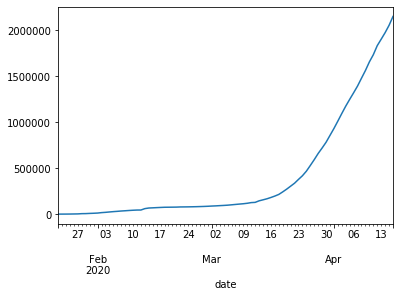

In [12]:
# Plot the time series
tsdata_global.set_index('date')['cases'].plot()

# Install python package

```bash
!pip install lmfit --user
```

In [4]:
## fit a model
from lmfit.models import LinearModel, LorentzianModel, ExponentialModel


In [20]:

model = ExponentialModel()
params = model.guess(tsdata_global['cases'], x=tsdata_global['days_since'])
result = model.fit(tsdata_global['cases'], params, x=tsdata_global['days_since'])

In [25]:
params


name,value,initial value,min,max,vary
amplitude,4528.64005,None,-inf,inf,True
decay,-13.5141870,None,-inf,inf,True


In [28]:
result

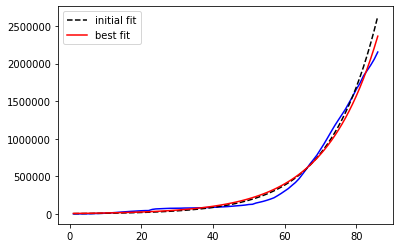

In [33]:
# Plot the results
import matplotlib.pyplot as plt

plt.plot(tsdata_global['days_since'], tsdata_global['cases'], 'b')
plt.plot(tsdata_global['days_since'], result.init_fit, 'k--', label='initial fit')
plt.plot(tsdata_global['days_since'], result.best_fit, 'r-', label='best fit')
plt.legend(loc='best')
plt.show()